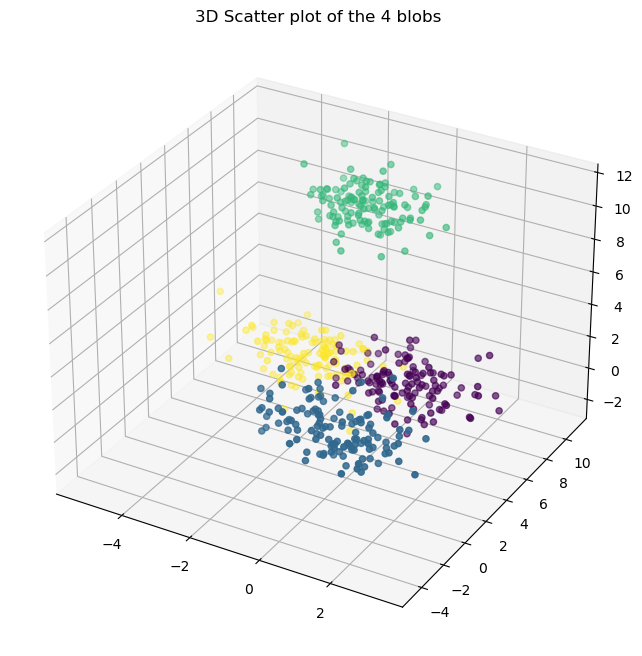

In [14]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a dataset with 4 blobs
X, y = make_blobs(n_samples=500, centers=4, n_features=3, random_state=0)

# Visualize the blobs in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o')
ax.set_title('3D Scatter plot of the 4 blobs')
plt.show()


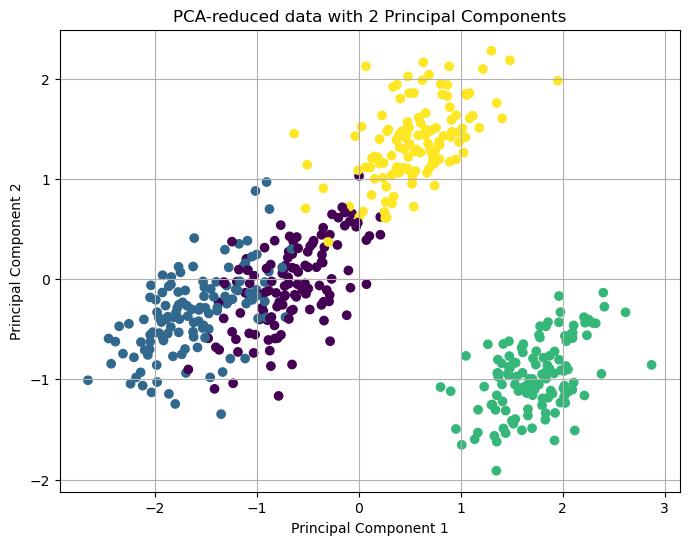

array([0.58228166, 0.29633078])

In [15]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Performing PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_std)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# One-vs-Rest Logistic Regression
ovr_logreg = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_logreg.fit(X_train, y_train)

# Visualize the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o')
plt.title('PCA-reduced data with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance ratio of the principal components
explained_variance = pca.explained_variance_ratio_

explained_variance


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = ovr_logreg.predict(X_test)

# Classification report
class_report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(class_report, conf_matrix)


              precision    recall  f1-score   support

           0       0.97      0.74      0.84        42
           1       0.84      0.98      0.90        42
           2       1.00      1.00      1.00        40
           3       0.90      1.00      0.95        26

    accuracy                           0.92       150
   macro avg       0.93      0.93      0.92       150
weighted avg       0.93      0.92      0.92       150
 [[31  8  0  3]
 [ 1 41  0  0]
 [ 0  0 40  0]
 [ 0  0  0 26]]


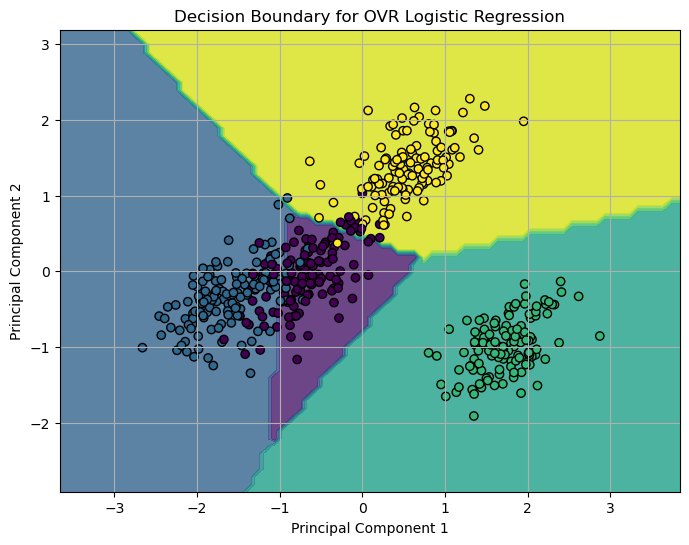

In [17]:
def plot_decision_boundary(X, y, model, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.1  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_pca, y, ovr_logreg, 'Decision Boundary for OVR Logistic Regression')
plt.show()


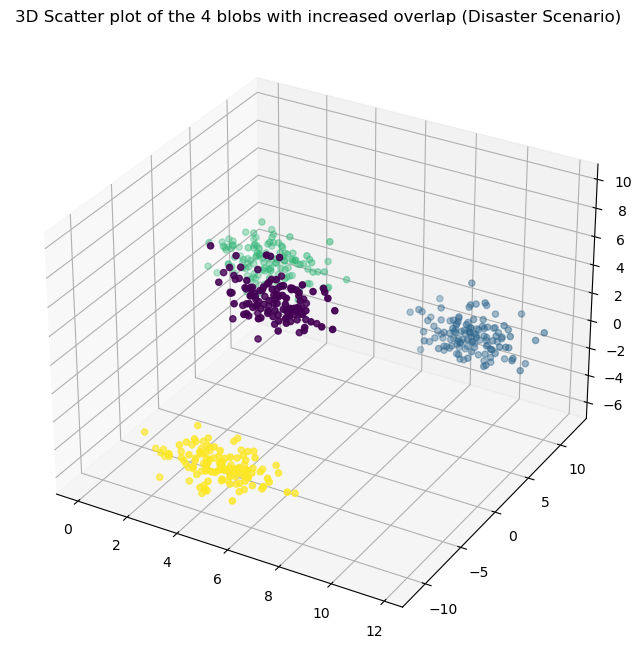

              precision    recall  f1-score   support

           0       0.69      0.44      0.54        41
           1       1.00      1.00      1.00        36
           2       0.54      0.77      0.64        35
           3       1.00      1.00      1.00        38

    accuracy                           0.79       150
   macro avg       0.81      0.80      0.79       150
weighted avg       0.81      0.79      0.79       150
 [[18  0 23  0]
 [ 0 36  0  0]
 [ 8  0 27  0]
 [ 0  0  0 38]]


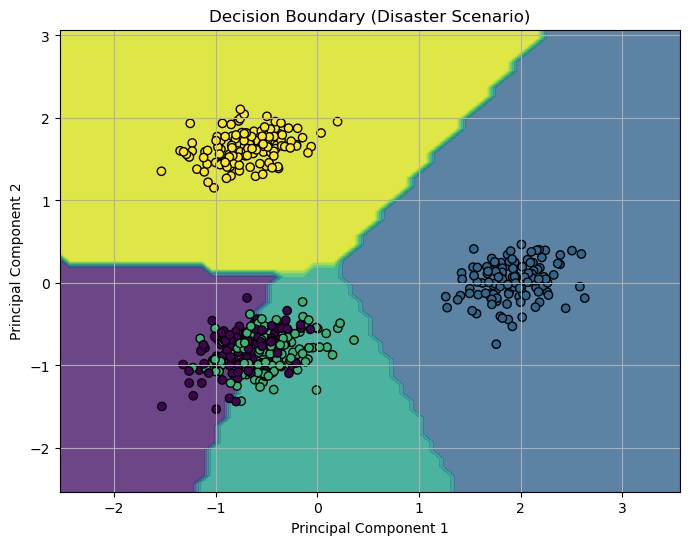

In [18]:
# Adjusting the `cluster_std` parameter to increase overlap between the blobs to simulate a 'disaster' scenario

# Create a dataset with 4 blobs with increased overlap
X_disaster, y_disaster = make_blobs(n_samples=500, centers=4, n_features=3, cluster_std=1.0, random_state=13)

# Visualize the blobs in 3D with increased overlap
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_disaster[:, 0], X_disaster[:, 1], X_disaster[:, 2], c=y_disaster, cmap='viridis', marker='o')
ax.set_title('3D Scatter plot of the 4 blobs with increased overlap (Disaster Scenario)')
plt.show()

# Standardizing the features
X_std_disaster = scaler.fit_transform(X_disaster)

# Performing PCA
pca_disaster = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca_disaster = pca_disaster.fit_transform(X_std_disaster)

# Split the dataset into training and testing sets
X_train_disaster, X_test_disaster, y_train_disaster, y_test_disaster = train_test_split(
    X_pca_disaster, y_disaster, test_size=0.3, random_state=0)

# One-vs-Rest Logistic Regression
ovr_logreg_disaster = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_logreg_disaster.fit(X_train_disaster, y_train_disaster)

# Predict on the test set
y_pred_disaster = ovr_logreg_disaster.predict(X_test_disaster)

# Classification report
class_report = classification_report(y_test_disaster, y_pred_disaster)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_disaster, y_pred_disaster)

print(class_report, conf_matrix)

# Plot the decision boundary for the disaster scenario
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_pca_disaster, y_disaster, ovr_logreg_disaster, 'Decision Boundary (Disaster Scenario)')
plt.show()
